# Testing the LangGraph Implementation

## Importing Libraries

In [1]:
from langgraph_flow import *
from read_emails import *

## Defining static emails

In [2]:
email1 = """Hello Saideep,




Thank you for applying to Samsung SDS America!!! We're excited you'd consider
joining us, and wanted to confirm we have received your application for our
open Logistics Data Analyst (EM6934) position. 

Although this is an automated message, our team is working hard to review
applications. We will be in touch if your experience is a good match for the
position.

Please know it may take sometime for us to get back to you.

In the meantime, we are glad to share with you a couple of resources to get to
know us a bit more.

Here are a few places you can learn more about Samsung SDS America:

Our Awards &amp; Recognition
Our Offerings
Our Events

Sometimes these emails can be filtered as spam. Please consider adding our
domain as a safe sender, or setting up a "not spam" filter rule to be sure our
emails come through.




Thanks again for your interest in Samsung SDS America!




Best regards,

Talent Acquisition Team

Samsung SDS America, Inc."""


email2 = """Have you had time to improve your resume?


[TopResume®]


You're up against 250 other candidates


Hi Saideep,


I noticed you’ve checked your resume review.


Even the most experienced professionals find it hard to craft the perfect resume. I bet you’ve achieved more in your career than you remember. It’s always a challenge to share your strengths and successes in a clear, concise way.

At the same time, the competition is always strong. When you apply for a job, you’re probably competing with 250 other candidates.

A certified resume writer will improve your chances.

---

Find Your Writer
<https://topresume.com/resume-writing?utm_content=cta_find_your_writer> 

---


Let me know if you have any questions.


Best wishes,


Sebastian King
TopResume Resume Expert
contact@topresume.com | 1-800-604-1929



[TopResume®]

©2025 TopResume
<https://topresume.com>


420 Lexington Ave | Suite 1402-1063 | New York, NY 10170


Privacy <https://topresume.com/privacy>

Terms of Use <https://topresume.com/terms>

Unsubscribe <https://topresume.com/unsubscribe>"""

email3 = """Hey Saideep,
Can we connect over a teams call tomorrow?
Regards, John Doe"""



## Creating and displaying graph

In [3]:
graph = build_graph()

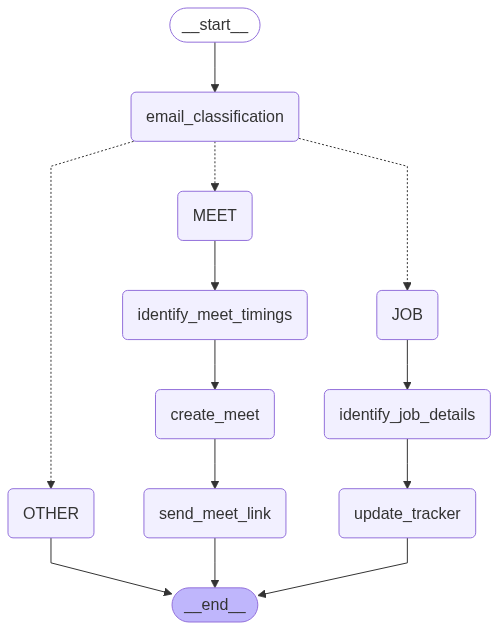

In [4]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    print("gone")
    pass

## Invoking graph with emails

In [5]:
graph.invoke({"email": email1})

---CLASSIFYING EMAIL---
Routing to: JOB
---IN JOB STATUS PATH---
This function reads the email to extract job title, company name and job status
This function updated the tracker with extracted job details


{'state': 'Tracker update successful',
 'email': 'Hello Saideep,\n\n\n\n\nThank you for applying to Samsung SDS America!!! We\'re excited you\'d consider\njoining us, and wanted to confirm we have received your application for our\nopen Logistics Data Analyst (EM6934) position. \n\nAlthough this is an automated message, our team is working hard to review\napplications. We will be in touch if your experience is a good match for the\nposition.\n\nPlease know it may take sometime for us to get back to you.\n\nIn the meantime, we are glad to share with you a couple of resources to get to\nknow us a bit more.\n\nHere are a few places you can learn more about Samsung SDS America:\n\nOur Awards &amp; Recognition\nOur Offerings\nOur Events\n\nSometimes these emails can be filtered as spam. Please consider adding our\ndomain as a safe sender, or setting up a "not spam" filter rule to be sure our\nemails come through.\n\n\n\n\nThanks again for your interest in Samsung SDS America!\n\n\n\n\nBest 

In [6]:
graph.invoke({"email": email2})

---CLASSIFYING EMAIL---
Routing to: OTHER
---IN OTHER PATH---


{'state': 'Other flow triggered',
 'email': "Have you had time to improve your resume?\n\n\n[TopResume®]\n\n\nYou're up against 250 other candidates\n\n\nHi Saideep,\n\n\nI noticed you’ve checked your resume review.\n\n\nEven the most experienced professionals find it hard to craft the perfect resume. I bet you’ve achieved more in your career than you remember. It’s always a challenge to share your strengths and successes in a clear, concise way.\n\nAt the same time, the competition is always strong. When you apply for a job, you’re probably competing with 250 other candidates.\n\nA certified resume writer will improve your chances.\n\n---\n\nFind Your Writer\n<https://topresume.com/resume-writing?utm_content=cta_find_your_writer> \n\n---\n\n\nLet me know if you have any questions.\n\n\nBest wishes,\n\n\nSebastian King\nTopResume Resume Expert\ncontact@topresume.com | 1-800-604-1929\n\n\n\n[TopResume®]\n\n©2025 TopResume\n<https://topresume.com>\n\n\n420 Lexington Ave | Suite 1402-1063

In [7]:
graph.invoke({"email": email3})

---CLASSIFYING EMAIL---
Routing to: MEET
---IN ONLINE MEET PATH---
This function reads the email to extract online meet requested date, time, duration
This function is to create online meet based on identified details
This function is to draft and send email including meet link


{'state': 'meet link sent',
 'email': 'Hey Saideep,\nCan we connect over a teams call tomorrow?\nRegards, John Doe',
 'classification': 'MEET',
 'meet_request_details': {'requested_by': 'johndoe@gmail.com',
  'date': '2025-07-13',
  'time': '9:00',
  'duration': '00:30'},
 'meet_details': {'meet_link': 'abcd link'},
 'meet_link_sent': 'Successful'}

## Reading from inbox and invoking graph

In [8]:
result = read_emails(max_results=5)
print(len(result))

27


In [9]:
for mail_details in result:

    email = mail_details['subject'] + '\n'+ mail_details['body']

    print(graph.invoke({"email":email}))
    print()
    print("="*100)
    print()

---CLASSIFYING EMAIL---
Routing to: OTHER
---IN OTHER PATH---
{'state': 'Other flow triggered', 'email': "New job opportunities at Ford Global Career Site\nHello Saideep, You might be a great fit for the new positions we just posted! We hope you're still interested in finding your dream job at Ford Motor Company. If so, we invite you to see if this might be the one. Learn more here: Software Engineer - Ford LLM See all opportunities Sincerely, Ford Talent Acquisition Team If you do not want to receive these job notifications, or if you want to update your preferences, go to our career site.", 'classification': 'OTHER'}


---CLASSIFYING EMAIL---
Routing to: OTHER
---IN OTHER PATH---
{'state': 'Other flow triggered', 'email': 'Methodist Hospital Specialty and Transplant is looking for Clinical ...\nAdzuna Job alert\r\n\r\n617 new DATA OR SCIENTIST jobs in San Antonio, TX. View your latest job matches here:\r\n\r\nhttps://www.adzuna.com/search?loc=185523&d=15&qor=Data+Scientist&adv=1&se=k